In [118]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from PIL import Image

In [18]:
Training_DIR = "Dataset/Training"
training_datagen = ImageDataGenerator(rescale = 1./255)

Validation_DIR = "Dataset/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [109]:
Train_gene = training_datagen.flow_from_directory(
    Training_DIR,
    target_size=(70,70),
    class_mode="categorical",
    batch_size=126
)
Val_gene = validation_datagen.flow_from_directory(
    Validation_DIR,
    target_size=(70,70),
    class_mode="categorical",
    batch_size=126
)

Found 4788 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [110]:
images,lables = next(Train_gene)

In [111]:
lables[2]
print(lables[2])
def nombre(p):
    if p[0] == 1.0 :
        seet="Mask"
    elif p[0] == 0.0 :
        seet="Nop_Mask"
    else:
        seet="Error"
    return seet
p_1=nombre(lables[2])
print(p_1)

[1. 0.]
Mask


9
[0. 1.]


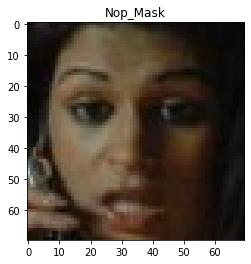

In [125]:
pos = random.randint(0,len(images))
print(pos)
print(lables[pos])
plt.imshow(images[pos])
plt.title(f"{nombre(lables[pos])}")
plt.show()

In [113]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(70, 70, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    ])

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 68, 68, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 34, 34, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 128)       

In [115]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics="accuracy")

In [116]:
print(type(validation_datagen))
val_dat_gen=np.asarray(validation_datagen)
print(type(val_dat_gen))

<class 'keras_preprocessing.image.image_data_generator.ImageDataGenerator'>
<class 'numpy.ndarray'>


In [126]:
model_history= model.fit(Train_gene, epochs=5, validation_data=Val_gene, verbose =1, validation_steps=3)

Epoch 1/5
38/38 [==============================] - 27s 704ms/step - loss: 0.1541 - accuracy: 0.9505 - val_loss: 0.1500 - val_accuracy: 0.9550
Epoch 2/5
38/38 [==============================] - 25s 669ms/step - loss: 0.1262 - accuracy: 0.9605 - val_loss: 0.0846 - val_accuracy: 0.9815
Epoch 3/5
38/38 [==============================] - 27s 700ms/step - loss: 0.0965 - accuracy: 0.9695 - val_loss: 0.1318 - val_accuracy: 0.9577
Epoch 4/5
38/38 [==============================] - 27s 717ms/step - loss: 0.0820 - accuracy: 0.9766 - val_loss: 0.0881 - val_accuracy: 0.9709
Epoch 5/5
38/38 [==============================] - 28s 744ms/step - loss: 0.0583 - accuracy: 0.9825 - val_loss: 0.0425 - val_accuracy: 0.9815


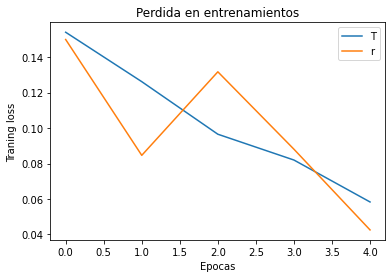

In [127]:
plt.plot(model_history.history["loss"], label="Training Loss")
plt.plot(model_history.history["val_loss"], label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Perdida en entrenamientos")
plt.xlabel("Epocas")
plt.ylabel("Traning loss")
plt.legend("Training loss")
plt.show()

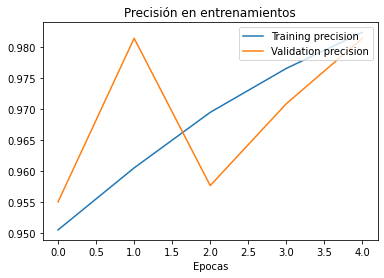

In [128]:
plt.plot(model_history.history["accuracy"], label="Training precision")
plt.plot(model_history.history["val_accuracy"], label="Validation precision")
plt.legend(loc="upper right")
plt.title("Precisión en entrenamientos")
plt.xlabel("Epocas")

plt.show()

In [129]:
predict = model.predict(Val_gene)

In [130]:
model.save("Face_Mask_detector.h5")

In [196]:
images_p1, lables_p1 = next(Val_gene)
def lbl_pre(p):
    if p[0] > p[1] :
        seet="Mask"
    else:
        seet="Nop_Mask"
    return seet

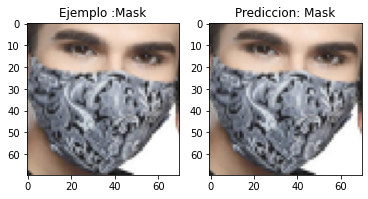

125
[1. 0.]
____________Prediccion_____________________
[1.0000000e+00 2.0653355e-14]
[1.0, 0.0]
0
Nop_Mask


In [223]:
pos = random.randint(0,len(images_p1))
figure, axis = plt.subplots(1, 2)
axis[0].imshow(images_p1[pos])
axis[0].set_title(f"Ejemplo :{nombre(lables_p1[pos])}")
  
axis[1].imshow(images_p1[pos])
axis[1].set_title(f"Prediccion: {lbl_pre(predict[pos])}")
plt.show()
print(pos)
print(lables_p1[pos])
print("____________Prediccion_____________________")
print(predict[pos])
res = [round(x,4) for x in predict[pos]]
print(res)
res_lbl = "Nop_Mask" if np.argmax(predict[pos]) == 0 else "Mask"
print(np.argmax(predict[pos]))
print(res_lbl)
